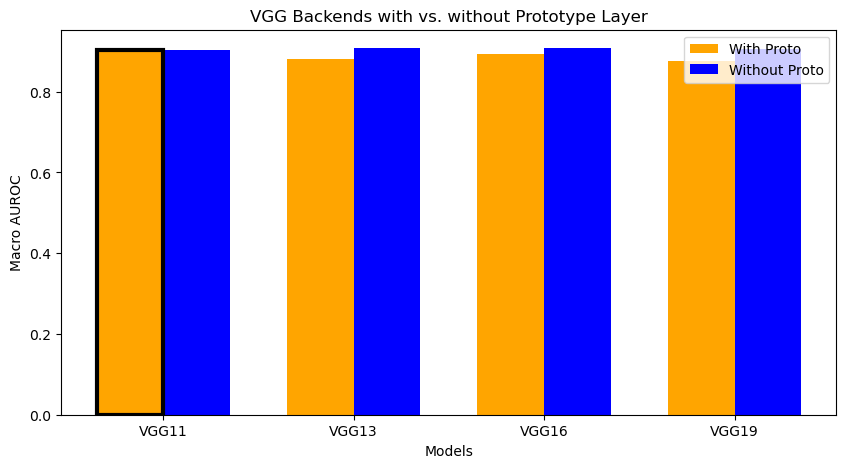

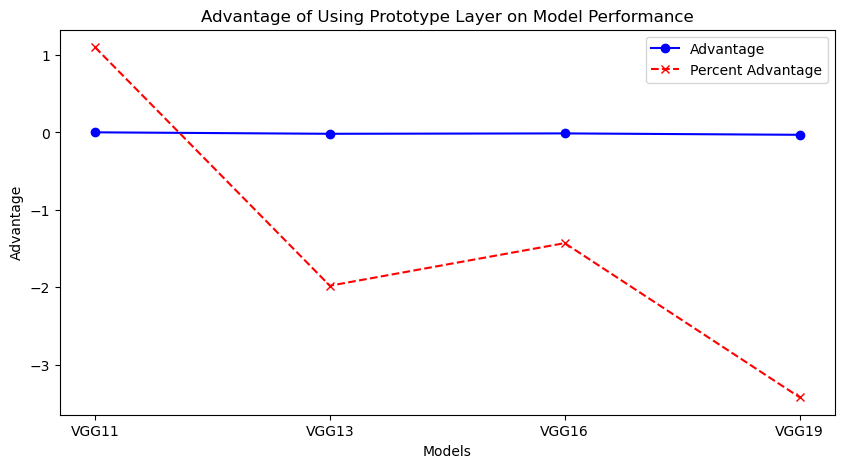

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import os

# Updated Data
models = ['VGG11', 'VGG13', 'VGG16', 'VGG19']
auroc_with_proto = [0.904, 0.880, 0.894, 0.875]
auroc_without_proto = [0.903, 0.908, 0.907, 0.906]
advantages = [0.001, -0.018, -0.013, -0.031]
percent_advantages = [1.1, -1.98, -1.43, -3.42]

# Get the current working directory
save_dir = os.getcwd()  # This will get the current working directory

# Plotting the first figure
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot for AUROC scores
bar_width = 0.35
index = np.arange(len(models))

colors_with_proto = ['orange' for model in models]
colors_without_proto = ['blue' for model in models]

bars_with_proto = ax1.bar(index, auroc_with_proto, bar_width, color=colors_with_proto, label='With Proto')
bars_without_proto = ax1.bar(index + bar_width, auroc_without_proto, bar_width, color=colors_without_proto, label='Without Proto')

ax1.set_xlabel('Models')
ax1.set_ylabel('Macro AUROC')
ax1.set_title('VGG Backends with vs. without Prototype Layer')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models)
ax1.legend()

# Add a border around the VGG11 bar
winning_bar = bars_with_proto[0]  # VGG11 with proto
x, y = winning_bar.get_xy()
width = winning_bar.get_width()
height = winning_bar.get_height()

border = patches.Rectangle((x, y), width, height, linewidth=3, edgecolor='black', facecolor='none')
ax1.add_patch(border)

# Show the plot first to ensure it's rendering correctly
plt.show()

# Save the first figure in the current working directory
fig1.savefig(os.path.join(save_dir, 'vgg_comparison.png'))  # Save as PNG file

# Plotting the second figure
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Line plot for advantages
ax2.plot(models, advantages, marker='o', color='blue', label='Advantage')
ax2.plot(models, percent_advantages, marker='x', color='red', linestyle='--', label='Percent Advantage')

ax2.set_xlabel('Models')
ax2.set_ylabel('Advantage')
ax2.set_title('Advantage of Using Prototype Layer on Model Performance')
ax2.legend()

# Show the second plot
plt.show()

# Save the second figure in the current working directory
fig2.savefig(os.path.join(save_dir, 'advantage_comparison.png'))  # Save as PNG file
